<a href="https://colab.research.google.com/github/SebaDiezV/challenge_telecomX-alura/blob/main/Challenge_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X**
##**Challenge de Alura Latam y Oracle para el curso de DataCience**


##**01 - Extracción de datos**

###**Importando libreria para el analisis de datos**

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**importando los datos de la API a un DataFrame**

In [177]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [178]:
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##**02 - Transformación de datos**

###**Comprobación de incoherencias en los datos**

Explorando las columnas del dataset y verificando sus tipos de datos.

In [179]:
type(df)

pandas.core.frame.DataFrame

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [181]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [182]:
df.shape

(7267, 6)

Comprobación de incoherencias en los datos e iniciando la normalización de las columnas que contienen diccionarios anidados

In [183]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [184]:
df_customer = df['customer'].apply(pd.Series)
df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [185]:
df_phone= df['phone'].apply(pd.Series)
df_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [186]:
df_internet = df['internet'].apply(pd.Series)
df_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [187]:
df_account = df['account'].apply(pd.Series)
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges
0,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [188]:
account_expand =pd.json_normalize(df_account['Charges'])
account_expand

,Monthly,Total
0,65.60,593.3
1,59.90,542.4
2,73.90,280.85
3,98.00,1237.85
4,83.90,267.4
...,...,...
7262,55.15,742.9
7263,85.10,1873.7
7264,50.30,92.75
7265,67.85,4627.65


In [189]:
df_account = pd.concat([df_account.drop(columns='Charges'), account_expand], axis=1)
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


Normalizando toda la información en  nuevo DataFrame

In [190]:
df_normalized = pd.concat([df.drop(['customer', 'phone', 'internet', 'account' ], axis=1), df_customer, df_phone, df_internet, df_account], axis=1)
df_normalized.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Se revisan las inconsistencias en el nuevo DataFrame

In [191]:
df_normalized.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [192]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Al revisar los valores unicos por columna encontramos que Churn y Total poseen valores en blanco

In [193]:
df_normalized.apply(pd.unique)

,0
customerID,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
Churn,"[No, Yes, ]"
gender,"[Female, Male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[Yes, No]"
tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
PhoneService,"[Yes, No]"
MultipleLines,"[No, Yes, No phone service]"
InternetService,"[DSL, Fiber optic, No]"


In [194]:
conteo= df_normalized.groupby('Churn').size()
conteo

,0
Churn,
,224
No,5174
Yes,1869


In [195]:
conteo= df_normalized.groupby('Total').size()
conteo

,0
Total,
,11
100.2,1
100.25,1
100.35,1
100.4,1
...,...
997.75,1
998.1,1
999.45,2


In [196]:
conteo= df_normalized.groupby('Monthly').size()
conteo

,0
Monthly,
18.25,1
18.40,1
18.55,1
18.70,2
18.75,2
...,...
118.20,1
118.35,1
118.60,2


###**Manejo de inconsistencias**

Ya que los valores en blanco son menores al 5% y es marginal para el análisis, se eliminan las filas con valores en blanco de Churn.

In [197]:
churn_empty = df_normalized[df_normalized.Churn == ''].index

In [198]:
churn_empty

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

In [199]:
df.loc[30]

,30
customerID,0047-ZHDTW
Churn,
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}"
internet,"{'InternetService': 'Fiber optic', 'OnlineSecu..."
account,"{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [200]:
df_normalized.drop((churn_empty), inplace=True)

In [201]:
conteo= df_normalized.groupby('Churn').size()
conteo

,0
Churn,
No,5174
Yes,1869


En el caso de Total, es coincidente que los valores vacios pertenecen a usuario que tienen menos de un mes con servicio contratado, por lo que se manejara reemplazando los valores vacíos por 0 y normalizando la columna a tipo de dato float.

En una revisión mas exaustiva, los valores vacíos eran espacios en blanco.

In [202]:
total_empty = df_normalized[df_normalized.Total == ''].index
total_empty

Index([], dtype='int64')

In [203]:
total_empty = df_normalized[df_normalized.Total == ' '].index
total_empty

Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [204]:
df_normalized['Total']=df_normalized['Total'].apply(lambda x: x.replace(' ','0'))

In [205]:
df_normalized['Total']=df_normalized['Total'].astype(np.float64)

In [206]:
df_normalized['Total'].dtype

dtype('float64')

In [207]:
df_normalized.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


La columna Monthly tambien se pasa a tipo de dato float.

In [208]:
df_normalized['Monthly']=df_normalized['Monthly'].astype(np.float64)

In [209]:
df_normalized['Monthly'].dtype

dtype('float64')

In [210]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

Se normalizan los nombres de las columnas a minuscula

In [211]:
df_normalized.columns = map(str.lower, df_normalized.columns)

In [212]:
df_normalized.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthly', 'total'],
      dtype='object')

###**Columna de cuentas diarias**

Se crea una nueva columna de cuentas diarias, que contendra el valor diario de los servicios contratados.

In [213]:
df_normalized['cuentas_diarias'] = round(df_normalized['monthly']/30 , 2)

In [214]:
df_normalized.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthly,total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


###**Estandarización y transformación de datos (opcional)**

Se camban los valores de la columnas cuyos valores son "Yes"/"No" y se reemplazan por 1 y 0.

Se normalizan las columnas cambiadas para tipo de dato int.

In [215]:
df_normalized.apply(pd.unique)

,0
customerid,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,"[No, Yes]"
gender,"[Female, Male]"
seniorcitizen,"[0, 1]"
partner,"[Yes, No]"
dependents,"[Yes, No]"
tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phoneservice,"[Yes, No]"
multiplelines,"[No, Yes, No phone service]"
internetservice,"[DSL, Fiber optic, No]"


In [216]:
df_normalized[['churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']] = df_normalized[['churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']].applymap(lambda x: x.replace('Yes','1').replace('No','0'))

<ipython-input-216-2592262841>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalized[['churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']] = df_normalized[['churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']].applymap(lambda x: x.replace('Yes','1').replace('No','0'))


In [217]:
df_normalized.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthly,total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [218]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

In [219]:
df_normalized[['churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']] = df_normalized[['churn', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']].astype(np.int64)

In [220]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   int64  
 5   dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   int64  
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

Se realiza un cambio de nombre de columnas a español para tener una mejor interpretación de los datos

In [221]:
df_normalized.rename(columns={'customerid':'id_cliente',
                              'churn':'cancelacion_cliente',
                              'gender':'genero',
                              'seniorcitizen':'adulto_mayor',
                              'partner':'pareja',
                              'dependents':'dependiente',
                              'tenure':'meses_contrato',
                              'phoneservice':'servicio_telefonico',
                              'multiplelines':'lineas_multiples',
                              'internetservice':'servicio_internet',
                              'onlinesecurity':'seguridad_online',
                              'onlinebackup':'respaldo_online',
                              'deviceprotection':'proteccion_dispositivos',
                              'techsupport':'soporte_tecnico',
                              'streamingtv':'tv_streaming',
                              'streamingmovies':'peliculas_streaming',
                              'contract':'tipo_contrato',
                              'paperlessbilling':'factura_online',
                              'paymentmethod':'metodo_pago',
                              'monthly':'mensualidad'}, inplace=True)

In [222]:
df_normalized.head()

,id_cliente,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


##**03 - Carga y análisis**

###**Análisis Descriptivo**

In [280]:
df_normalized[['mensualidad','total', 'cuentas_diarias']].describe()

,mensualidad,total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,2.158675
std,30.090047,2266.794470,1.003088
min,18.250000,0.000000,0.610000
25%,35.500000,398.550000,1.180000
50%,70.350000,1394.550000,2.340000
75%,89.850000,3786.600000,2.990000
max,118.750000,8684.800000,3.960000


###**Distribución de evasión**

Proporción de clientes que permanecieron y los que se dieron de baja.

In [224]:
conteo_churn= df_normalized['cancelacion_cliente'].value_counts()
conteo_churn

,count
cancelacion_cliente,
0,5174
1,1869


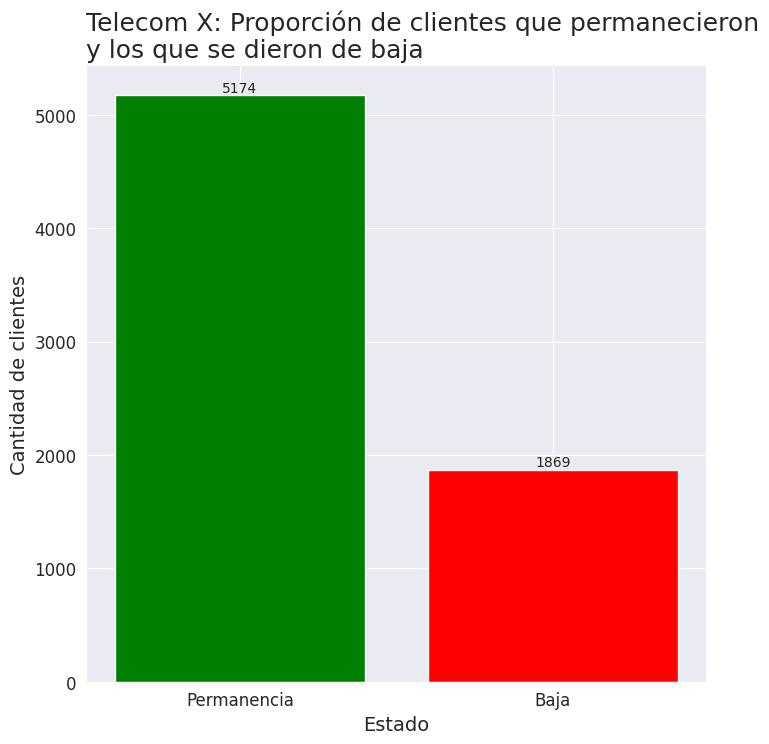

In [276]:
fig,ax =plt.subplots(figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
sns.set_style('darkgrid')
sns.set_palette('deep')

bars = ax.bar(conteo_churn.index.astype(str), conteo_churn.values, color=['green', 'red'])
ax.set_title('Telecom X: Proporción de clientes que permanecieron\ny los que se dieron de baja',
             loc='left', fontsize=18)
ax.set_xlabel('Estado', fontsize =14)
ax.set_ylabel('Cantidad de clientes', fontsize =14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permanencia', 'Baja'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha='center', va='bottom')

plt.show()

In [226]:
por_genero = df_normalized[['cancelacion_cliente', 'genero']]
por_genero['genero'].value_counts()

,count
genero,
Male,3555
Female,3488


In [227]:
baja_por_genero = por_genero[por_genero['cancelacion_cliente']==1]
perm_por_genero = por_genero[por_genero['cancelacion_cliente']==0]
baja_por_genero = baja_por_genero['genero'].value_counts()
perm_por_genero = perm_por_genero['genero'].value_counts().sort_values()
perm_por_genero

,count
genero,
Female,2549
Male,2625


In [228]:
baja_por_genero

,count
genero,
Female,939
Male,930


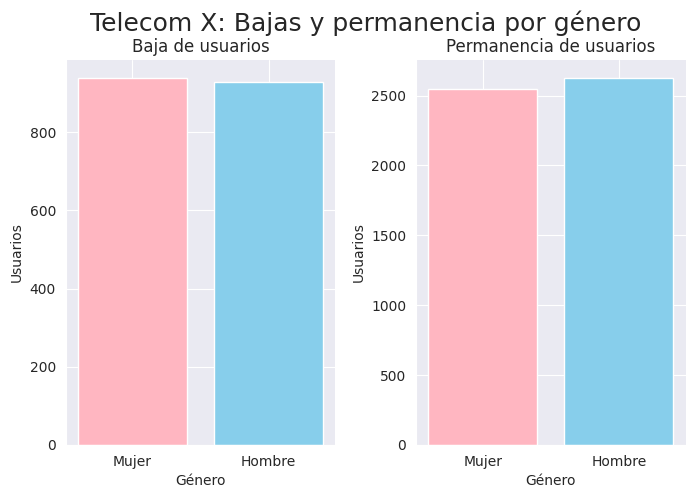

In [261]:
fig,axs = plt.subplots(1,2, figsize=(8,5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Telecom X: Bajas y permanencia por género', fontsize=18)
sns.set_style('whitegrid')
sns.set_palette('deep')

axs[0].bar(baja_por_genero.index.astype(str) ,baja_por_genero.values,color=[ 'lightpink','skyblue'])
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Usuarios')
axs[0].set_xticks(['Female', 'Male'])
axs[0].set_xticklabels(['Mujer', 'Hombre'])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_title('Baja de usuarios')



axs[1].bar(perm_por_genero.index.astype(str) ,perm_por_genero.values ,color=['lightpink','skyblue'])
axs[1].set_xlabel('Género')
axs[1].set_ylabel('Usuarios')
axs[1].set_xticks(['Female', 'Male'])
axs[1].set_xticklabels(['Mujer', 'Hombre'])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_title('Permanencia de usuarios')

plt.show()

In [230]:
por_contrato = df_normalized[['cancelacion_cliente', 'tipo_contrato']]
por_contrato['tipo_contrato'].value_counts()

,count
tipo_contrato,
Month-to-month,3875
Two year,1695
One year,1473


In [231]:
baja_contrato = por_contrato[por_contrato['cancelacion_cliente']==1]
perm_contrato = por_contrato[por_contrato['cancelacion_cliente']==0]
baja_contrato = baja_contrato['tipo_contrato'].value_counts()
perm_contrato = perm_contrato['tipo_contrato'].value_counts()


In [232]:
baja_contrato

,count
tipo_contrato,
Month-to-month,1655
One year,166
Two year,48


In [233]:
perm_contrato

,count
tipo_contrato,
Month-to-month,2220
Two year,1647
One year,1307


In [234]:
orden_contratos = ['Month-to-month', 'One year', 'Two year']
baja_contrato = baja_contrato.reindex(orden_contratos)
perm_contrato = perm_contrato.reindex(orden_contratos)

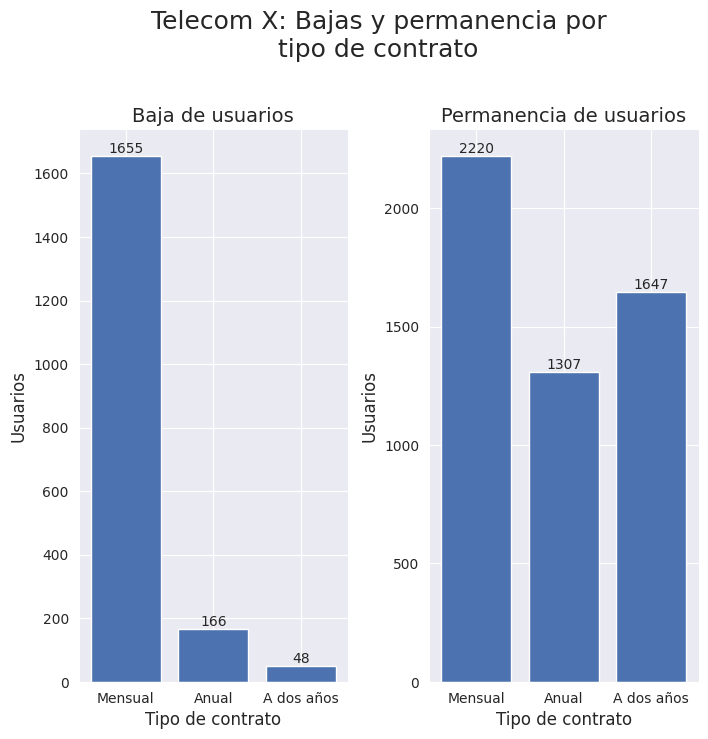

In [260]:
fig,axs = plt.subplots(1,2, figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3, top=0.8)
fig.suptitle('Telecom X: Bajas y permanencia por\ntipo de contrato', fontsize=18, y = 0.95)
sns.set_style('darkgrid')
sns.set_palette('deep')

bars1 = axs[0].bar(baja_contrato.index.astype(str) ,baja_contrato.values)
axs[0].set_xlabel('Tipo de contrato', fontsize =12)
axs[0].set_ylabel('Usuarios',fontsize =12)
axs[0].set_xticks(orden_contratos)
axs[0].set_xticklabels(['Mensual', 'Anual', 'A dos años'])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_title('Baja de usuarios', fontsize =14)

for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha='center', va='bottom')




bars2 = axs[1].bar(perm_contrato.index.astype(str) ,perm_contrato.values)
axs[1].set_xlabel('Tipo de contrato',fontsize =12)
axs[1].set_ylabel('Usuarios',fontsize =12)
axs[1].set_xticks(orden_contratos)
axs[1].set_xticklabels(['Mensual', 'Anual', 'A dos años'])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_title('Permanencia de usuarios',fontsize =14)

for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha='center', va='bottom')

plt.show()

In [236]:
por_metodo_pago = df_normalized[['cancelacion_cliente', 'metodo_pago']]
por_metodo_pago['metodo_pago'].value_counts()

,count
metodo_pago,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [237]:
baja_metodo_pago = por_metodo_pago[por_metodo_pago['cancelacion_cliente']==1]
perm_metodo_pago = por_metodo_pago[por_metodo_pago['cancelacion_cliente']==0]
baja_metodo_pago= baja_metodo_pago['metodo_pago'].value_counts()
perm_metodo_pago = perm_metodo_pago['metodo_pago'].value_counts()

In [238]:
orden_metodo = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)']
baja_metodo_pago = baja_metodo_pago.reindex(orden_metodo)
perm_metodo_pago = perm_metodo_pago.reindex(orden_metodo)

In [239]:
baja_metodo_pago

,count
metodo_pago,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


In [240]:
perm_metodo_pago

,count
metodo_pago,
Electronic check,1294
Mailed check,1304
Bank transfer (automatic),1286
Credit card (automatic),1290


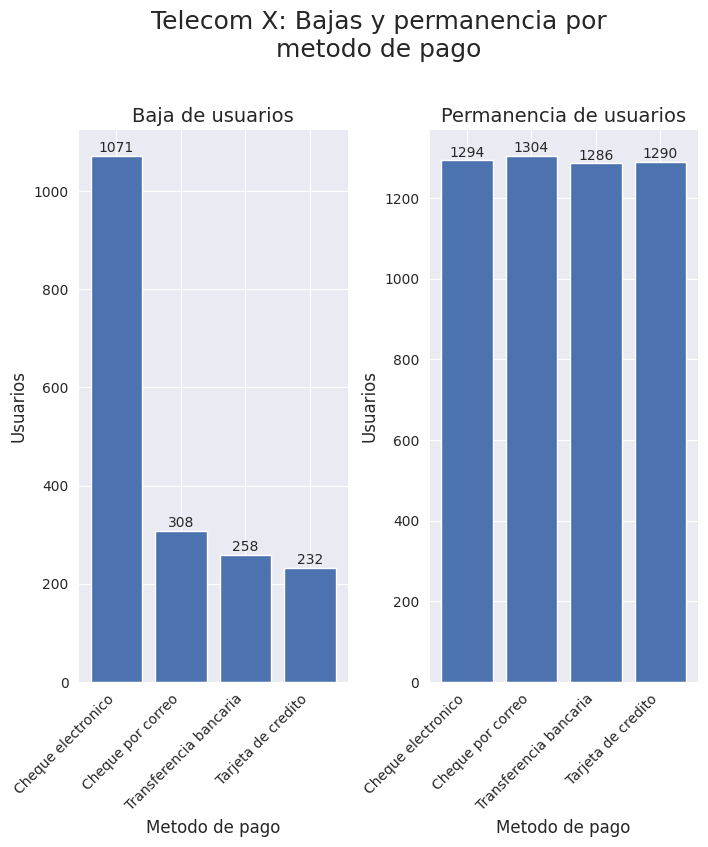

In [264]:
fig,axs = plt.subplots(1,2, figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3, top=0.8)
fig.suptitle('Telecom X: Bajas y permanencia por\nmetodo de pago', fontsize=18, y = 0.95)
sns.set_style('darkgrid')
sns.set_palette('deep')


bars1 = axs[0].bar(baja_metodo_pago.index.astype(str) ,baja_metodo_pago.values)#,color=[ 'red','skyblue'])
axs[0].set_xlabel('Metodo de pago', fontsize =12)
axs[0].set_ylabel('Usuarios',fontsize =12)
axs[0].set_xticks(orden_metodo)
axs[0].set_xticklabels(['Cheque electronico', 'Cheque por correo', 'Transferencia bancaria','Tarjeta de credito'])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
#axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_title('Baja de usuarios', fontsize =14)

for label in axs[0].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
    label.set_va('top')

for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha='center', va='bottom')




bars2 = axs[1].bar(perm_metodo_pago.index.astype(str) ,perm_metodo_pago.values) #,color=['lightpink','skyblue'])
axs[1].set_xlabel('Metodo de pago',fontsize =12)
axs[1].set_ylabel('Usuarios',fontsize =12)
axs[1].set_xticks(orden_metodo)
axs[1].set_xticklabels(['Cheque electronico', 'Cheque por correo', 'Transferencia bancaria','Tarjeta de credito'])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
#axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_title('Permanencia de usuarios',fontsize =14)

for label in axs[1].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
    label.set_va('top')

for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha='center', va='bottom')

plt.show()

###**Conteo de evasión por variables numéricas**

Histograma total gastado

In [282]:
df_normalized['cancelacion_cliente'] = df_normalized['cancelacion_cliente'].map({0: 'No', 1: 'Sí'})

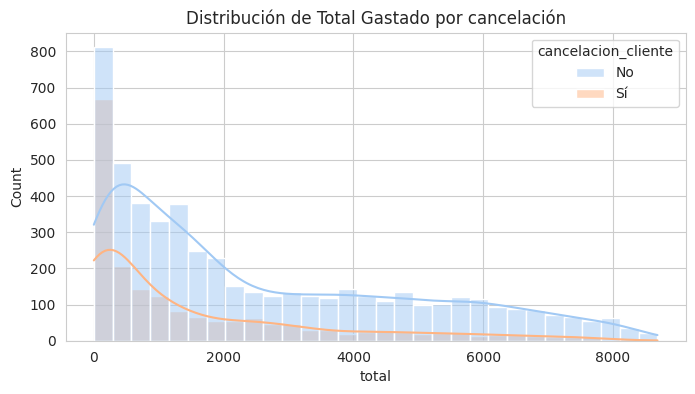

In [284]:
sns.set_style('whitegrid')
sns.set_palette('pastel')
plt.figure(figsize=(8, 4))
sns.histplot(data=df_normalized, x='total', hue='cancelacion_cliente', kde=True, bins=30)
plt.title('Distribución de Total Gastado por cancelación')
plt.show()


Boxplot Meses de contrato

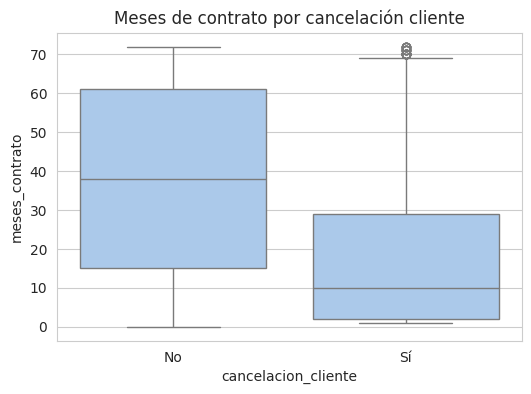

In [290]:
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.boxplot(data=df_normalized, x='cancelacion_cliente', y='meses_contrato')
plt.title('Meses de contrato por cancelación cliente')
plt.show()

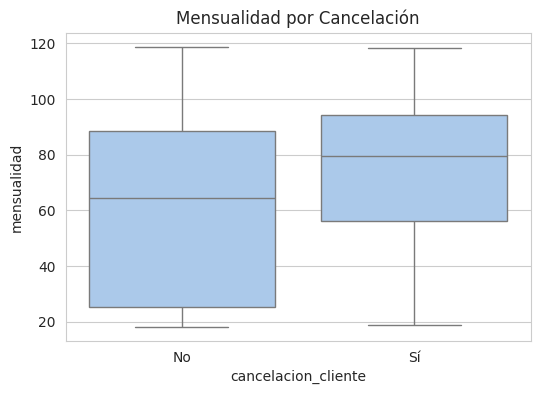

In [294]:
# Boxplot: Mensualidad
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_normalized, x='cancelacion_cliente', y='mensualidad')
plt.title('Mensualidad por Cancelación')
plt.show()